# Distributions 2 : Continous Distributions
**FIZ371 - Scientific & Technical Computations | 06/04/2020**

**Continous Distributions**
 * Reprise: Galton Machine
 * Gaussian (Normal) Distribution
    * Mean and standard variance of the binomial distribution (or is it the normal distribution?.. ;)
      * Mean Value (μ)
      * Standard variation (σ)
    * Gaussian distribution, final form
    * Application: The Six σ
    * A code of our own: Deriving the  σσ  distribution ratios stochastically
 * Poisson Distribution
    * Assignment / HW : mean and variance of Poisson distribution
    * Example: Airplane accidents
  
Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Reprise: Galton Machine
In our [previous lecture](FIZ371_LN10_EST_Distributions_1.md), we defined and analyzed the Galton machine and also implemented a simulator for it. That code is reproduced below, this time functionalized with the number of levels & balls as its input parameters:

In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def Galton(n,N):
    # Fixing the seed so that the results are repeatable
    np.random.seed(371)

    # n: Number of levels
    # N: Number of balls

    # Initialize the boxes (numbered from 0 to n)
    arr_boxes = np.zeros(n+1)

    # Loop over the balls
    for i in range(0,N):
        position = 0
        for level in range(0,n):
            direction = np.random.randint(2)
            # print(direction,end=" ")
            position += direction

        # if it goes left everytime, then the position
        # would be: 0 which is the leftmost box: 0

        # if it goes right everytime, then the position
        # would be: +n which is the rightmost box: #n
        # print(str(position))
        arr_boxes[position] += 1
    #d#print("Simulation results:")
    #d#print(arr_boxes/N)

    #d#print("")

    # Let's compare it with the direct Pascal's triangle results:
    pascal_triangle = np.zeros(n+1)
    for kk in range(n+1):
        pascal_triangle[kk] = comb(n,kk)
    #print(pascal_triangle)
    pascal_triangle = pascal_triangle / np.sum(pascal_triangle)
    #d#print("Pascal's Triangle:")
    #d#print(pascal_triangle)

    # While we're at it, let's also plot the probabilities by
    # dividing the number of balls in each box to the tall # of balls:
    plt.bar(range(n+1),arr_boxes/N)

    # and project upon it the values from Pascal's triangle:
    plt.bar(range(n+1),pascal_triangle,color="none",edgecolor="red")
    
    mu = np.dot(arr_boxes/N,range(n+1))
    std= np.sqrt(np.dot(arr_boxes/N,(range(n+1)-mu)**2))
    print("---------------------------------------------------------")
    print("n:%3d Levels | N:%d Balls"%(n,N))
    print("mean: %.5f | std dev: %.5f"%(mu,std))
    plt.xlim(mu-3*std,mu+3*std)
    plt.title("n:%3d Levels | N:%d Balls"%(n,N))
    plt.show()
    return arr_boxes/N

---------------------------------------------------------
n:  4 Levels | N:10000 Balls
mean: 1.99480 | std dev: 0.99638


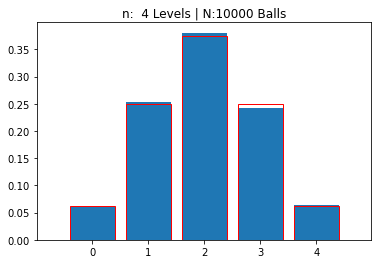

[0.061  0.2525 0.3807 0.2423 0.0635]


In [2]:
# So we can call it now like:
g = Galton(4,10000)
print(g)

This time, we're going to increase the number of levels (and also to have statistically meaningful results, we will ensure that there is a sufficient number of balls to accompany them 8).

---------------------------------------------------------
n: 10 Levels | N:1000 Balls
mean: 5.01900 | std dev: 1.58134


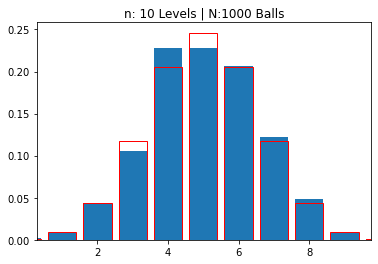

---------------------------------------------------------
n: 25 Levels | N:2500 Balls
mean: 12.44880 | std dev: 2.46661


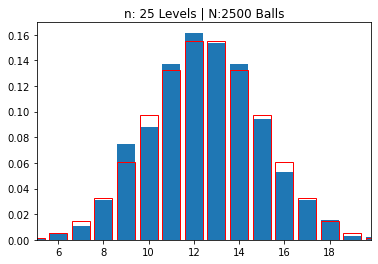

---------------------------------------------------------
n: 50 Levels | N:5000 Balls
mean: 24.88080 | std dev: 3.53579


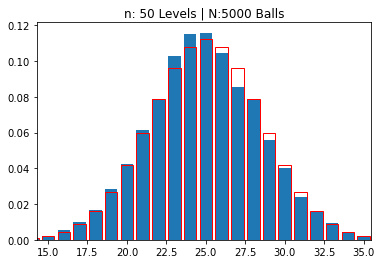

---------------------------------------------------------
n:100 Levels | N:10000 Balls
mean: 49.89790 | std dev: 4.96444


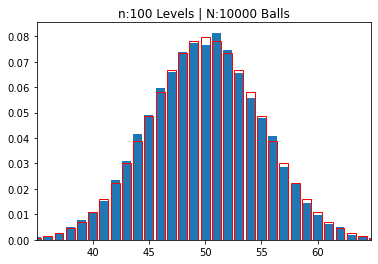

---------------------------------------------------------
n:250 Levels | N:25000 Balls
mean: 124.97924 | std dev: 7.93965


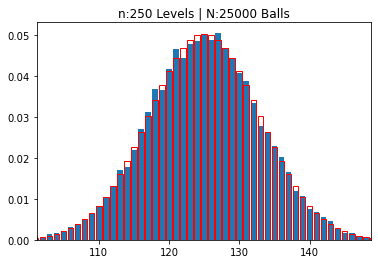

In [3]:
#for i in np.array([10,25,50,100,250,500,1000]):
for i in np.array([10,25,50,100,250]):
    n = i
    N = 100*n
    g = Galton(n,N)

So, you can see that, as the number of levels increase, naturally the number of "boxes" also increase and a pattern emerges. The "thickness" of the boxes becomes thinner, as we "zoom out" to fit more and more boxes in our graph and the overall distribution looks like a symmetrical "bell" centered on the middle box.

# Gaussian (Normal) Distribution

This bell-like shaped curve has its very special place in statistics and in nature: it is called a Gaussian curve and [we are going to derive the fact][Howard Haber's Physics 116 page] that as $n \rightarrow \infty$, binomial distribution becomes Gaussian distribution, just as the graphs above suggest. This distribution occurs so frequently that, it is also called the "normal" distribution.

[Howard Haber's Physics 116 page]: http://scipp.ucsc.edu/~haber/ph116C/NormalApprox.pdf

Remember that, the probability of the chosen outcome happening $k$ times out of $n$ tries was given by the binomial probability distribution function as:

$$P(n,k)
=\frac{n!}{k!\left(n-k\right)!}\,p^k\, \left(1-p\right)^{n-k}$$

where $p$ being the probability of the chosen outcome happening in a single try (and thus $(1-p)$ corresponding to the probability of the chosen outcome _not_ happening).

For the sake of practicality (and taking the next step to continous distribution in the case of: $k\rightarrow x$), we will switch to different symbols in the proof:
* $x$ will replace $k$
* we will denote $(1-p)$ by $q$
so, our PDF above will be re-written as:

$$P(x) = \frac{n!}{x!\left(n-x\right)!}\,p^x\, q^{n-x}$$

We will be working in the $n\rightarrow\infty$ limit, justifying the approximations.

To get rid of the factorials, we will use [Stirling's approximation](https://en.wikipedia.org/wiki/Stirling%27s_approximation):

$$n! \approx n^n e^{-n} \sqrt{2\pi n}$$

Substitution of all the factorials yields:

$$\begin{align*}
P(x) &= \frac{n^n e^{-n} \sqrt{2\pi n}}{\left[x^x e^{-x} \sqrt{2\pi x}\right]
\left[(n-x)^{n-x} e^{-(n-x)}\sqrt{2 \pi (n-x)}\right]
}p^x q^{n-x}\\
&=(p\,/x)^x (q\,/(n-x))^{n-x} n^n \sqrt{\frac{n}{2\pi x (n-x)}}\\
&=\left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x} \sqrt{\frac{n}{2\pi x (n-x)}}
\end{align*}$$

If we define: $\delta = x - np$, then $x=\delta+np$ and $n-x = nq-\delta$. 

From here we can write:

$$
\begin{align*}
\ln\left(\frac{np}{x}\right) &= \ln\left(\frac{np}{np+\delta}\right) = -\ln\left(1 + \frac{\delta}{np}\right)\\
\ln\left(\frac{nq}{n-x}\right) &= \ln\left(\frac{nq}{nq-\delta}\right) = -\ln\left(1 - \frac{\delta}{nq}\right)
\end{align*}$$

At this point we'll take the logarithm of the probability function's $\left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x}$ part:

$$\ln\left[\left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x}\right] = x\ln\left(\frac{np}{x}\right)+(n-x) \ln\left(\frac{nq}{n-x}\right)$$


Substitute $x=\delta+np$, $n-x = nq-\delta$, the above logarithmic identities, and use the expansion:  

$$\ln(1+x) = x - \frac{1}{2} x^2$$
to have:  

$$\begin{align*}
\ln\left[\left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x}\right] &= x\ln\left(\frac{np}{x}\right)+(n-x) \ln\left(\frac{nq}{n-x}\right)\\
&=-(\delta+np)\left[\frac{\delta}{np}-\frac{1}{2}\frac{\delta^2}{n^2 p^2}\right] - (nq-\delta)\left[-\frac{\delta}{nq} -\frac{1}{2} \frac{\delta^2}{n^2 q^2} \right]\\
&=-\delta\left[1 + \frac{1}{2} \frac{\delta}{np} -1 + + \frac{1}{2} \frac{\delta}{nq}\right]\\
&=-\frac{\delta^2}{2n p q}
\end{align*}$$

(we have also used the $p+q=1$ identity)

We are almost there... We exponentiate the above equation to retrieve $\left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x}$ in the original function:

$$\rightarrow \left(\frac{np}{x}\right)^x\left(\frac{nq}{n-x}\right)^{n-x} = e^{-\delta^2/2npq} = e^{-(x-np)^2/2npq}$$

The square root factor still remains, so let's work on it a little:

$$\sqrt{\frac{n}{2\pi x (n-x)}} = \sqrt{\frac{n}{2\pi (np+\delta) (nq-\delta)}} = \sqrt{\frac{1}{2\pi npq}} = \frac{1}{\sqrt{2\pi npq}}$$

Combining all, we have:

$$P(x) =  \frac{1}{\sqrt{2\pi npq}} e^{-(x-np)^2/2npq}$$

# Mean and standard variance of the binomial distribution (or is it the normal distribution?.. ;)
## Mean Value ($\mu$)
(Once again, we are using [Howard Haber's Physics 116 page]( http://scipp.ucsc.edu/~haber/ph116C/NormalApprox.pdf) for this section, as well)

We start from the binomial distribution:

$$P(n,k) = C(n,k)\,p^k\, q^{n-k}$$

where

$$C(n,k) \equiv \frac{n!}{k!\left(n-k\right)!}$$

as we have seen in the course on the binomial distribution. $p$ is the probability that the outcome will be success and $q$ is the probability that it will be failure, thus $q = 1-p$.

As is usual with statistics, we'll start pursuing a seemingly not related identity ("let's begin by taking...") and then in the end find out that it becomes a very practical solution to our needs.

So, _let's begin by taking_ the expansion of $(p+q)^n$:

$$(p+q)^n = \sum_{k=0}^{n}{C(n,k)\,p^k q^{n-k}}$$

Check that this is just the binomial expansion, nothing fancy than for example: $(a+b)^2 = a^2 + 2ab + b^2$ or $(a+b)^3 = a^3 + 3a^2 b + 3a b^2 + b^3$, with the $C(n,k)$ coefficients being the coefficients of the Pascal's triangle. So it holds for **any** $a,b$ -- not just $p,q$ with $p+q=1$ (but we'll also exploit this fact later as well! 8)

Now, _for some reason_, we undergo an irrestible sensation that we have to take the equation's derivative with respect to $p$ and further multiply it by $p$, to obtain:

$$p \frac{d}{dp}\left[(p+q)^n = \sum_{k=0}^{n}{C(n,k)\,p^k q^{n-k}}\right]\\
p \frac{d}{dp} (p+q)^n = p\sum_{k=0}^{n}{k C(n,k)\,p^{k-1} q^{n-k}}=\sum_{k=0}^{n}{k C(n,k)\,p^{k} q^{n-k}}\\
np (p+q)^{n-1} = \sum_{k=0}^{n}{k C(n,k)\,p^{k} q^{n-k}}$$

In the second row, we applied the $p$ times derivation to the right side, and the in the third row, we applied it to the left side. As we have written above, this equation is valid for any $p,q$. But we'll now take into account that, as $p+q=1$ through our definition of them as being the probabilities of one of the only two possible outcomes ("binom" -- remember?), so it becomes:

$$np=\sum_{k=0}^{n}{k P(k)}$$

Which is the mean value of the distribution by definition ("summing up the possible values multiplied by their probability"), so:

$$\mu = <k> = \bar{k} = np$$

_In the limit $n\rightarrow\infty$, discrete $k$ values becomes continous $x$ values_

## Standard variation ($\sigma$)
We follow a similar path for the calculation of the variance and standard variation. In this case we take:


$$p^2 \frac{d^2}{dp^2}\left[(p+q)^n = \sum_{k=0}^{n}{C(n,k)\,p^k q^{n-k}}\right]\\
n (n-1)p^2(p+q)^{n-2} = \sum_{k=0}^{n}{k (k-1) C(n,k)\,p^{k} q^{n-k}}$$


Once again, the above equation will hold for any $p,q$, but further  applying the relation of $p+q=1$, we get:


$$n (n-1)p^2 = \sum_{k=0}^{n}{k^2 P(k)} - \sum_{k=0}^{n}{k^ P(k)}$$


From the definition of mean, we can equate the right side to $\overline{x^2}$ and ${\overline{x}}$, respectively, so:


$$\overline{x^2} = n (n-1)p^2 + np$$


Hence, the variance and the standard variation turns out to be:


$$\sigma^2 = \overline{x^2} - {\overline{x}}^2 = n(n-1)p^2+np-n^2 p^2 = np (1 - p)$$


Substituting $q = (1-p)$, we finally arrive at:


$$\sigma^2 = npq\\
\sigma = \sqrt{npq}$$

# Gaussian distribution, final form
Checking out the derived distribution by taking $n\rightarrow\infty$ and thus allowing many possible $k$ values such that we switch from discrete $k$ values to _continous_ $x$ values, we have:

$$P(x) =  \frac{1}{\sqrt{2\pi npq}} e^{-(x-np)^2/2npq}$$

Lo and behold! We see that there are $npq$s and $np$ lying around!!! We've already derived that the mean $\mu = np$ and the variance $\sigma^2 = npq$, so let's substitute them in the equation and we'll have:

$$P(x) =  \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)^2/2\sigma^2}$$

We have seen that $\mu$ and $\sigma$ are the mean and standard deviations, and in addition, they are the two characteristic parameters that define a Gaussian distribution. $\mu$ defines the location for the symmetry axis and $\sigma$ determines the "wideness" or, the "extensiveness" of our distribution. As the total integral from $x=-\infty$ to $x=\infty$ must be equal to 1 (meaning that, the total probability that any one of the possible outcomes will be (will be, que sera, sera... 8)), for higher number of $\sigma$, our distribution must _distribute_ itself to a wider range, thus lowering its maximum probabilities' values.

Here are a couple of Gaussian distributions for a variety of $(\mu,\sigma)$ values:

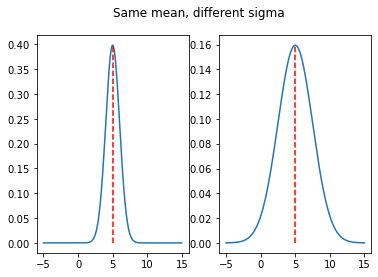

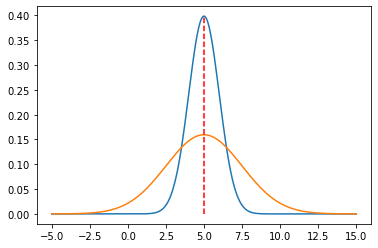

---------------------------------------------


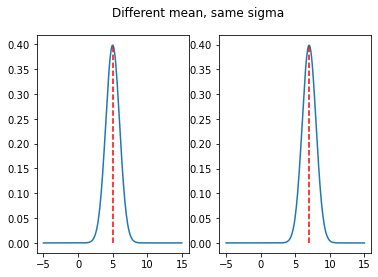

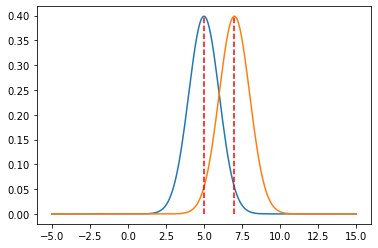

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-5,15,200)

# Our reference distribution with mu = 5, sigma=1
g_5_1 = norm.pdf(x,loc=5,scale=1)

# Same mean, different sigma
g_5_2p5 = norm.pdf(x,loc=5,scale=2.5)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Same mean, different sigma")
ax1.plot(x,g_5_1,"",[5,5],[0,np.max(g_5_1)],"r--")
ax2.plot(x,g_5_2p5,"",[5,5],[0,np.max(g_5_2p5)],"r--")
plt.show()

plt.plot(x,g_5_1,"",x,g_5_2p5,"",[5,5],[0,np.max(g_5_1)],"r--")
plt.show()

# ----------------------------------
print("-"*45)

# Different mean, same sigma
g_7_1 =  norm.pdf(x,loc=7,scale=1)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Different mean, same sigma")
ax1.plot(x,g_5_1,"",[5,5],[0,np.max(g_5_1)],"r--")
ax2.plot(x,g_7_1,"",[7,7],[0,np.max(g_7_1)],"r--")
plt.show()

plt.plot(x,g_5_1,"",x,g_7_1,"",[5,5],[0,np.max(g_5_1)],\
         "r--",[7,7],[0,np.max(g_7_1)],"r--")
plt.show()

Let's find out the value of a distribution when it's $\sigma$ away from the mean:

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-5,15,200)

# Our reference distribution with mu = 5, sigma=1
g_5_1 = norm.pdf(x,loc=5,scale=1)
print("P(x|5,1): Max probability (at x = mu = 5, of course)  : %.5f"%norm.pdf(5,loc=5,scale=1))
g_5_1_sigma = 1
print("P(x|5,1): Probability at x = mu "+u"\u00B1"+" sigma : %.5f"%norm.pdf(5-1,loc=5,scale=1))
print("Ratio of P(x=mu)/P(x=mu"+u"\u00B1"+"sigma): %.15f"%(norm.pdf(5,loc=5,scale=1)/norm.pdf(5-1,loc=5,scale=1)))

print("-"*45)

# Same mean, different sigma
g_5_2p5 = norm.pdf(x,loc=5,scale=2.5)
print("P(x|5,2.5): Max probability (at x = mu = 5, of course): %.5f"%norm.pdf(5,loc=5,scale=2.5))
print("P(x|5,2.5): Probability at x = mu "+u"\u00B1"+" sigma : %.5f"%norm.pdf(5-2.5,loc=5,scale=2.5))
print("Ratio of P(x=mu)/P(x=mu"+u"\u00B1"+"sigma): %.15f"%(norm.pdf(5,loc=5,scale=2.5)/norm.pdf(5-2.5,loc=5,scale=2.5)))

P(x|5,1): Max probability (at x = mu = 5, of course)  : 0.39894
P(x|5,1): Probability at x = mu ± sigma : 0.24197
Ratio of P(x=mu)/P(x=mu±sigma): 1.648721270700128
---------------------------------------------
P(x|5,2.5): Max probability (at x = mu = 5, of course): 0.15958
P(x|5,2.5): Probability at x = mu ± sigma : 0.09679
Ratio of P(x=mu)/P(x=mu±sigma): 1.648721270700128


So, the standard deviation has the property such that when you travel sigma away from the mean value, the probability decreases "1.648721270700128"th of the maximum value. 

_Does_ <u>1.648721270700128</u> _seem familiar?_ No?.. Then how about:

`2.718281828459045`

Yes, that's the most famous [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant)), _e_ (as in $\exp$). Let's take its root:

In [6]:
print("     e  = %.15f"%np.exp(1))
print("sqrt(e) = %.15f"%np.exp(0.5))

     e  = 2.718281828459045
sqrt(e) = 1.648721270700128


![JamesHence_Beaker_Scream.jpg](images/JamesHence_Beaker_Scream.jpg)
(James Hence - "The Meep")

![mindblown.jpg](images/mindblown.jpg)
[Mindblown!!!](https://www.youtube.com/watch?v=9CS7j5I6aOc)

So, for a Gaussian distribution, we can alternatively define the standard deviation as the distance from the mean where the probability decreases to $\frac{1}{\sqrt{e}}$ of its maximum value.

**Duh?...**

Let's proceed from math's point of view, using the Gaussian distribution formula:

$$P(x) =  \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)^2/2\sigma^2}$$

at $x = \mu$, this becomes:

$$
\begin{align*}
P(\mu) &=  \frac{1}{\sqrt{2\pi}\sigma} e^{-(\mu-\mu)^2/2\sigma^2}\\
&=\frac{1}{\sqrt{2\pi}\sigma} e^{0}\\
&=\frac{1}{\sqrt{2\pi}\sigma}
\end{align*}$$

What about the probability when $x = \mu\pm\sigma$?

$$\begin{align*}
P(\mu\pm\sigma) &=  \frac{1}{\sqrt{2\pi}\sigma} e^{-(\mu\pm\sigma-\mu)^2/2\sigma^2}\\
&=\frac{1}{\sqrt{2\pi}\sigma}e^{-\sigma^2/2\sigma^2} =\frac{1}{\sqrt{2\pi}\sigma}e^{-1/2}\\
&=\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{\sqrt{e}}
\end{align*}$$

Thus:

$$\frac{P(\mu)}{P(\mu\pm\sigma)} = \frac{\frac{1}{\sqrt{2\pi}\sigma}}{\frac{1}{\sqrt{2\pi}\sigma}\frac{1}{\sqrt{e}}}=\sqrt{e}$$

Now it doesn't seem to be so mindblowing but just a boring (and an obvious) derivation... but remember, this is _just_ maths. We will be doing physics and modeling, so it's more important to pay attention to the <u>meaning</u> of the $\sigma$ than what it does on a dull mathematical formula (it's similar to the information transferred by saying "the magnitude of the space a circle covers is equal to $\pi r^2$" than simply writing a general and vague math equation of $\pi r^2$ which can mean anything and nothing).

# Application: The Six $\sigma$
I recommend you to stop reading at this instant and google for "[the six sigma](https://www.google.com/search?q=the+six+sigma&oq=the+six+sigma&hl=en)". Most of the results you are going to fine will be <strike>stupid</strike> self-pompitous "excel yourself, reach the skies bla bla..." junk sites but their root lies on pure statistics. Here is how.

So, let's start once again with a nice Gaussian distribution characterized by $\mu = 5$ & $\sigma = 2.5$ $\Rightarrow P(x|\mu=5,\sigma=2.5)$:

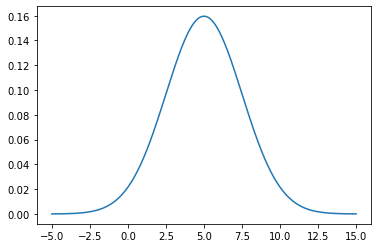

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-5,15,200)

# Our reference distribution with mu = 5, sigma=1
g_5_2p5 = norm.pdf(x,loc=5,scale=2.5)

plt.plot(x,g_5_2p5)
plt.show()

Since our distribution is normalized, when we calculate the integral:

$$I=\int_{-\infty}^{\infty}{P(x|\mu=5,\sigma=2.5)\, dx}$$

we expect to find 1.

In [8]:
import numpy as np
from scipy import integrate

G = lambda x: norm.pdf(x,loc=5,scale=2.5)
[I,err] = integrate.quad(G,-np.inf,np.inf)
print("I = %.5f"%I)

I = 1.00000


This time, let's gradually integrate our distribution \[from $(\mu - n\cdot\sigma)$ to $\left(\mu - \left(n-1\right)\cdot\sigma\right)
$\] + \[from $\left(\mu + \left(n-1\right)\cdot\sigma\right)$ to $(\mu + n\cdot\sigma)$] with $n = 1\dotsc7$, i.e., 

$$\int_{\mu-n\sigma}^{\mu-(n-1)\sigma}{P(x|\mu,\sigma)\, dx} + \int_{\mu+(n-1)\sigma}^{\mu+n\sigma}{P(x|\mu,\sigma)\, dx}$$

In [9]:
import numpy as np
from scipy import integrate

mean = 5
sigma = 2.5
G = lambda x: norm.pdf(x,loc=mean,scale=sigma)
I_tot = 0
for n in range(1,8):
    [I,err] = integrate.quad(G,mean-n*sigma,mean-(n-1)*sigma)
    I_tot += 2*I
    print("n:%d - Range: [μ-%dσ,μ] U [μ,μ+%dσ]\n --> I U I = 2*%.10f = %.10f (I_Tot = %.15f)"%(n,n,n,I,2*I,I_tot))

n:1 - Range: [μ-1σ,μ] U [μ,μ+1σ]
 --> I U I = 2*0.3413447461 = 0.6826894921 (I_Tot = 0.682689492137086)
n:2 - Range: [μ-2σ,μ] U [μ,μ+2σ]
 --> I U I = 2*0.1359051220 = 0.2718102440 (I_Tot = 0.954499736103642)
n:3 - Range: [μ-3σ,μ] U [μ,μ+3σ]
 --> I U I = 2*0.0214002339 = 0.0428004678 (I_Tot = 0.997300203936740)
n:4 - Range: [μ-4σ,μ] U [μ,μ+4σ]
 --> I U I = 2*0.0013182268 = 0.0026364536 (I_Tot = 0.999936657516334)
n:5 - Range: [μ-5σ,μ] U [μ,μ+5σ]
 --> I U I = 2*0.0000313846 = 0.0000627692 (I_Tot = 0.999999426696856)
n:6 - Range: [μ-6σ,μ] U [μ,μ+6σ]
 --> I U I = 2*0.0000002857 = 0.0000005713 (I_Tot = 0.999999998026825)
n:7 - Range: [μ-7σ,μ] U [μ,μ+7σ]
 --> I U I = 2*0.0000000010 = 0.0000000020 (I_Tot = 0.999999999997440)


Formatting the output:

|$n$ | $P(x\in \mathfrak{R}_A)$ |$P(x\in \mathfrak{R}_B)$|$P(x\in \mathfrak{R}_C)$
----|----|----|----
1|34.1%|68.2%|68.27%
2|13.6%|27.2%|95.45%
3|2.14%|4.3%|99.73%
4|0.13%|0.26%|99.994%
5|0.003%|0.006%|99.99994%
6|0.00003%|0.00006|99.9999998%
7|0.00000010%|0.00000020|99.9999999997%

where the ranges in the probabilities are defined as:

$\mathfrak{R}_A: x \in \left[\mu - n \sigma,\,\mu - (n-1) \sigma\right]$ 
$\mathfrak{R}_B: x \in \left[\mu-n\sigma,\,\mu-(n-1)\sigma\right] \cup \left[\mu+(n-1)\sigma,\,\mu+n\sigma\right]$  
$\mathfrak{R}_C: x \in \left[\mu-n\sigma,\,\mu+n\sigma\right]$

They look cool, but what's the meaning of these? 

* Let's start with the last range, $P(x \in \mathfrak{R}_C)$: It is the probability that an event randomly choosen from the given distribution will be within (upto) the $[\mu-n\sigma,\mu+n\sigma]$ range.  

  For example, if we randomly draw a number from a Gaussian distribution with $\mu = 5$ and $\sigma = 2.5$, the probability that the number we get will be in between -2.5 and 12.5 is 99.73% $(n=3:\;(\mu-3\sigma = 5-3\times2.5=-2.5) \quad\&\quad(\mu+3\sigma = 5+3\times2.5=12.5) )$.

* First range, $P(x \in \mathfrak{R}_A)$ lists the exclusive probability that the randomly drawn number will belong to the exclusive interval between $\mu - n \sigma$ and $\mu - (n-1) \sigma$. 

  _(As the distribution is symmetric (even) around $\mu$, this is also equal to the probability of the number being from the $[\mu+(n-1)\sigma,\,\mu+n\sigma]$ interval)_
  
  So, for example, if we once again consider $n=3$, the probability that a randomly drawn number from our distribution to be from $[5-3\times 2.5,\,5-2\times 2.5]=[-2.5,\,0]$ _(or equivalently from $[5+2\times 2.5,\,5+3\times 2.5]= [10,\,12.5]$)_ is 2.14%
  
* And finally, the 2nd column gives the probability that the randomly chosen value will be either to the left or to the right of the mean by $(n-1)\sigma$ to $n\sigma$.
  
  In our example ($n=3$) this means that, the randomly chosen value will be either between $5-7.5\dotsc5-5 = -2.5\dotsc0$ **or** between $5+5\dotsc5+7.5=10\dotsc12.5$ with a probability of 4.3%

![6sigmas.png](images/6sigmas.png)
(Experimental Design - From User Studies to Psychophysics by Cunningham & Wallraven)

But, really, what does this mean? Take nanotechnology lab for example, let's assume they are producing very refined nanotubes on demand. Due to the comptetition, their profit margin is really cut and it means that they really have to be careful. They have received an order of 1μg C(9,9) armchair type carbon nanotubes. Due to their production methods, there is a chance that some other types of nanotubes (like C(10,10) or C(9,8), etc..) can exist in the process, reducing the pureness. As long as they are working in the 2σ range, it's OK. There is a 68% chance that the outcome will be within the desired pureness. The erroneous nanotubes can be C(9,8) (lower in diameter) or C(10,10) (greater in diameter), but as long as their ratio is 13.6% it's also acceptable. But what is not acceptable is when the radii are greated than C(10,10)s (then they clog the vessel) or lower than C(9,8) (where they slip through the pores in the material). So this means that a 2σ precision/quality is required.

In another example: consider the following news back from the days when the evasive Higgs' Boson was found. They were "99.99994%" sure (or "5 sigmas" as it was declared in the official announcement):

["We observe in our data clear signs of a new particle, at the level of 5 sigma, in the mass region around 126 GeV."](https://cds.cern.ch/record/1459454?ln=en)

(You can also check [What does the 5 sigma mean?](http://www.physics.org/article-questions.asp?id=103))

# A code of our own: Deriving the $\sigma$ distribution ratios stochastically
One of the questions in the final exam of (20191's) FIZ353 : Numerical Analysis course was:

_Show that when N is sufficiently great (~10000), for an ideal Gaussian distribution the number of the elements within the  $\sigma$ neighborhood of the mean constitute around 68.2% of the total; those lying within $\sigma$ and  $2\sigma$ constitute 13.6% of the total and between $2\sigma$ and  $3\sigma$ amounts to 2.1% of the total._

In the above, we've derived these numbers/ratios via integration but we can also do it stochastically, i.e., by drawing random numbers from a Gaussian distribution and then analyzing their range frequencies, so let's do that!

1. Define a Gaussian distribution by specifying $\mu$ and $\sigma$.
2. Draw $N$ random values to build a set.
3. Calculate the mean and standard deviation of this set (they will be close to but not exactly the same as the ones we specified in step 1 -- why is that?)
4. Count the number of elements ($n_i$) in the set for each one of the intervals mean -- n x stddev (and also $\mu$ -- $n\times\sigma$ - which one of these two is better?).
5. Divide $\{n_i\}$ to $N$ to find the probabilities -- multiply them by 100 if you want to write them in '%' notation.

In [10]:
import numpy as np

# Fixing the seed so that the results are repeatable
np.random.seed(371)
mu = 50
sigma = 7

N = 10000
gauss_data = np.random.normal(mu, sigma, N)

mean = np.mean(gauss_data)
stddev =np.std(gauss_data)

print("Calculated mean: %.5f | std dev: %.5f\n"%(mean,stddev))

RANGE = [-3,-2,-1,1,2,3]

for n in range(len(RANGE)-1):
    print("[%2d*sigma+mu,%2d*sigma+mu) "%(RANGE[n],RANGE[n+1]),end="")
    lim1 = mu+RANGE[n]*sigma;
    lim2 = mu+RANGE[n+1]*sigma;
    lim1B = mean+RANGE[n]*stddev;
    lim2B = mean+RANGE[n+1]*stddev;
    print("[%8.4f,%8.4f]"%(lim1,lim2))
    n_i = sum((gauss_data>=lim1) & (gauss_data<lim2))
    n_iB = sum((gauss_data>=lim1B) & (gauss_data<lim2B))
    print("\t        using (μ,σ): %6.3f (%.3f%%)"%(n_i/N,n_i/N*100))
    print("\tusing (mean,stddev): %6.3f (%.3f%%)"%(n_iB/N,n_iB/N*100))
    print("-"*45)

Calculated mean: 50.07108 | std dev: 6.97154

[-3*sigma+mu,-2*sigma+mu) [ 29.0000, 36.0000]
	        using (μ,σ):  0.022 (2.170%)
	using (mean,stddev):  0.023 (2.260%)
---------------------------------------------
[-2*sigma+mu,-1*sigma+mu) [ 36.0000, 43.0000]
	        using (μ,σ):  0.133 (13.280%)
	using (mean,stddev):  0.135 (13.510%)
---------------------------------------------
[-1*sigma+mu, 1*sigma+mu) [ 43.0000, 57.0000]
	        using (μ,σ):  0.686 (68.610%)
	using (mean,stddev):  0.684 (68.420%)
---------------------------------------------
[ 1*sigma+mu, 2*sigma+mu) [ 57.0000, 64.0000]
	        using (μ,σ):  0.136 (13.600%)
	using (mean,stddev):  0.135 (13.480%)
---------------------------------------------
[ 2*sigma+mu, 3*sigma+mu) [ 64.0000, 71.0000]
	        using (μ,σ):  0.020 (1.980%)
	using (mean,stddev):  0.020 (1.970%)
---------------------------------------------


# Poisson Distribution
When we took the limit of the number of possible outcomes through a binomial decision tree (i.e., drastically increased the levels of the Galton machine), we arrived to Gaussian (normal) distribution. We mentioned that, the Gaussian distribution was the way nature worked around: there is a most likely defined average (mean) and then the further you moved away from this average, the less probable you'd encounter a specimen from that region. For instance: let the average height of adult Turkish females be 1.63m[*](http://www.cumhuriyet.com.tr/haber/iste-turkiyedeki-ortalama-erkek-ve-kadin-boyu-864030). This means that we'll likely find many people between 1.60m - 1.65m alas not that many with heights around 1.30m. Or if the average of the grades in regard to an exam is 45% -- we don't expect many people with a grade higher than 80%. These are all normally expected outcomes and it comes to us naturally.

But there are cases when the probability of something occuring is very low, like a plane crashing or a harddisk recently out of the factory to malfunction or a radioactive element's decay within a short time margin. For these kinds of situations we once again begin from binomial distribution but this time we take the probability to be very low such that aside from the $n\rightarrow\infty$, we now also have the limit: $p\rightarrow0$). Since the first is very high and the latter very low, it is sufficient that their product is some finit number (which we'll refer to as $\lambda\; (np \rightarrow \lambda > 0$).

For our derivation, let's start once again by this wonderful intution to take the limit of $y=(1-p)^{1/p}$ as $p\rightarrow 0$:

$$\lim_{p\rightarrow0}{\ln y} = \lim_{p\rightarrow0}{\frac{\ln (1-p)}{p}}=\lim_{p\rightarrow0}{\frac{-1/(1-p)}{1}}=-1$$

where we applied [L'Hospital's Rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) to evaluate the limit. Now that we know $\lim_{p\rightarrow0}{\ln y} = -1$, we can exponentiate both sides to yield $\lim_{p\rightarrow0}{y}$:

$$\lim_{p\rightarrow0}{y}=\lim_{p\rightarrow0}{(1-p)^{1/p}} = e^{-1}$$

Why we did these? We'll see in a minute (I really hate this "pre-derivations out of nowhere" 8P).

Now we all know that, the probability of an outcome with a probability $p$, happening $k$ times out of $n$ drawings/choosings is given by the binomial distributions:

$$\begin{align*}P(k) &= C(n,k)\, p^k (1-p)^{n-k} = \frac{n!}{k!\left(n-k\right)!} p^k (1-p)^{n-k}\\&= \frac{n(n-1)\dotsc(n-k+1)}{k!} \frac{p^k(1-p)^n}{(1-p)^k}\\
&=\frac{(np)^k}{k!}\left(\frac{n-1}{n}\right)\dotsc \left(\frac{n-k+1}{n}\right)\frac{\left[(1-p)^{1/p}\right]^{np}}{(1-p)^k}
\end{align*}$$

As $n\rightarrow\infty$: 

$$\lim_{n\rightarrow\infty}{\frac{n-\#}{n}}=1$$

where $\#$ is a finite number. 

Also, as $p\rightarrow0$:

$$\lim_{p\rightarrow0}{\frac{1}{(1-p)^k}} = \frac{1}{1^k} = 1$$


So taking the limit of $P(k)$ and also substituting $\lambda = np$ in this limit, we have:

$$\lim_{n\rightarrow\infty\\p\rightarrow0}{P(k)}=\frac{\lambda^k \left(e^{-1}\right)^\lambda}{k!}=\frac{\lambda^k e^{-\lambda}}{k!}$$

where we used the identity $\lim_{p\rightarrow0}{(1-p)^{1/p}} = e^{-1}$ we derived in the beginning of this section.

This probability distribution function:

$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

that describes the probability of a very-low chance outcome ($p\rightarrow0$) happening k times out of a very high (practically infinite) number of drawings/tries/choosings ($n\rightarrow\infty$) is called as the **Poisson Distribution**.

## Assignment / HW : mean and variance of Poisson distribution
Show that the mean value and the variance of a Poisson distribution, characterized by a $\lambda$ parameter, are as follows:
* $\mu = \lambda$
* $\sigma^2 = \lambda$

## Example: Airplane accidents
On every $10^{12}$ flight miles, an accident occurs on average.

What is the probability of an accident happening up to:  
    a) $10^9$ flight miles?  
    b) $10^{13}$ flight miles?

**Solution**  
$p = 1/10^{12} = 10^{-12}$ (hence, very very low)

a) $n = 10^9$ (very very high)

$$\lambda = n\,p=10^9.\,10^{-12} = 10^{-3}$$

probability that no accident happens: $k = 0$ (k: # of accidents)

$$P(k=0) = \frac{e^{-\lambda}\lambda^k}{k!} = \frac{\left(e^{-\left(10^{-3}\right)}\right)\left(10^{-3}\right)^0}{0!} = 0.999$$

In [11]:
P_0 = np.exp(-(10**-3))
print(P_0)

0.999000499833375


That was the probability that no accident occurs. Thus, the probability that -at least- an accident occurs will be:  
1 - (probability that no accident occurs)  
= 1 - 0.999000499 = 0.0009995

In [12]:
P_1 = 1 - P_0
print(P_1)

0.000999500166624978


b) 

$$\lambda = 10^{13}.\,10^{-12} = 10^1\\
P(k=0) = \frac{\left(e^{-\left(10\right)}\right)\left(10^{-1}\right)^0}{0!} = 0.0000454$$

The probability that -at least- an accident occurs will be:  
1 - (probability that no accident occurs)  
= 1 - 0.0000454 = 0.99995